In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from global_settings import * 
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

run="run1"
ratio="0.6"
mass = "0.05"

base_bkg = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/{}_samples/".format(run)
base_signal = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/{}_signal/".format(run)
figs_dir = "/home/lmlepin/Desktop/Plots_DT_Drive/2023/CNN_plots/"


if(run=="run1"):
    run_flag = "Run 1"
else:
    run_flag = "Run 3"

steps = ["8441", "9241", "11526"]

In [2]:
def GetEfficiency(df,label):
    efficiency = []
    cnn_scores = np.linspace(0.,1.0,309)
    n_total = len(df[df['signal_score'] >= 0.])
    eff_at_cut = 0 
    for score in cnn_scores:
        if(label == "background"):
            n_top = len(df[df['signal_score'] < score])
            eff_temp = n_top/n_total
            efficiency.append(eff_temp)
        elif(label == "signal"):
            n_top = len(df[df['signal_score'] >= score])
            eff_temp = n_top/n_total
            if(score == 0.5):
                eff_at_cut = n_top/n_total
            efficiency.append(eff_temp)
    return cnn_scores, efficiency, eff_at_cut

In [3]:
efficiency_signal = []
efficiency_bkg = []
eff_at_cut_arr = []
bkg_scores_arr = []
decays = ["pi0", "eta"]
for step in steps:
    df_nu = pd.read_csv(base_bkg + run + "_nu_overlay_CNN_scores_{}_steps.csv".format(step))
    df_dirt = pd.read_csv(base_bkg + run + "_dirt_CNN_scores_{}_steps.csv".format(step))
    df_offbeam = pd.read_csv(base_bkg + run + "_offbeam_CNN_scores_{}_steps.csv".format(step))
    df_final = df_nu.append(df_dirt,ignore_index=True)
    df_final = df_final.append(df_offbeam,ignore_index=True)
    df_final = df_final[df_final['signal_score'] >= 0.]
    bkg_scores, bkg_efficiency_temp, dummy_eff = GetEfficiency(df_final,"background")
    
    bkg_scores_arr.append(bkg_scores)
    efficiency_bkg.append(bkg_efficiency_temp)
    
    df_signal = pd.DataFrame()
    for dmode in decays:
        df_temp = pd.read_csv(base_signal + "{}_dt_ratio_{}_{}_{}_CNN_scores_{}_steps.csv".format(run,ratio,mass,dmode,step))
        df_signal = df_signal.append(df_temp, ignore_index=True)
    df_signal = df_signal[df_signal['signal_score'] >= 0.]
    signal_scores, temp_eff, eff_at_cut = GetEfficiency(df_signal,label="signal")
    eff_at_cut_arr.append(eff_at_cut)
    efficiency_signal.append(temp_eff)

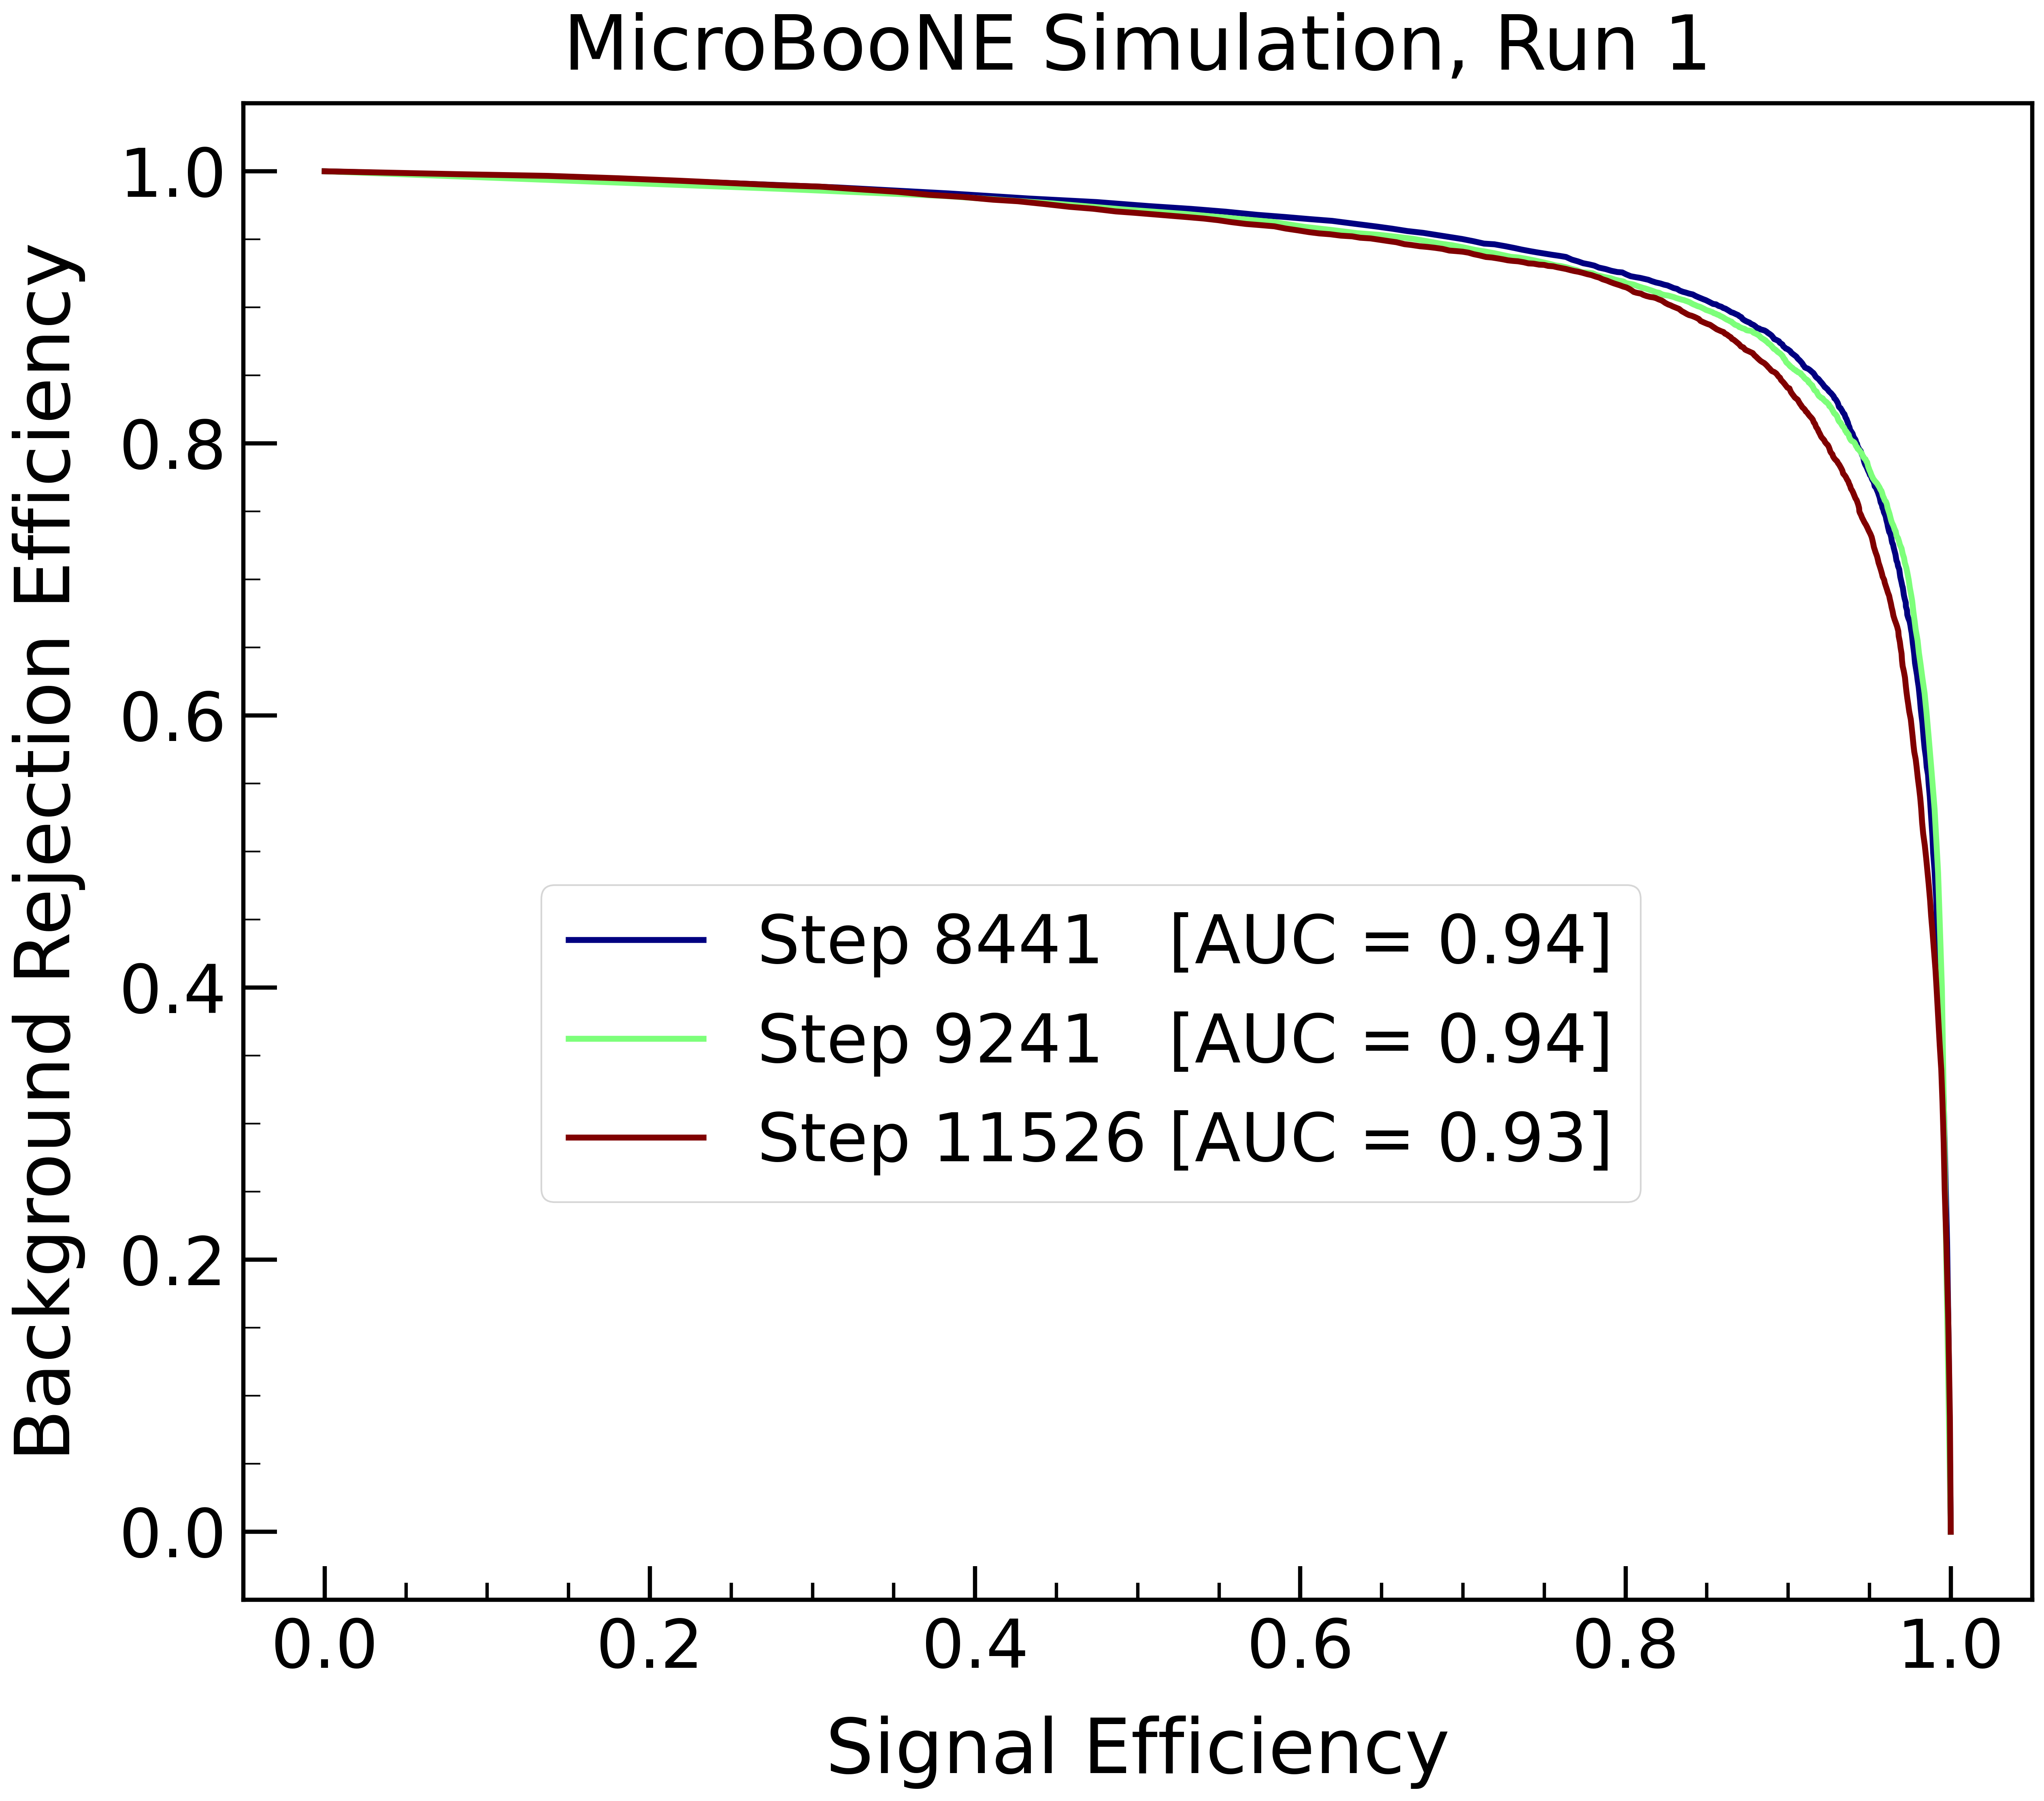

In [4]:
colors = plt.cm.jet(np.linspace(0,1,len(steps)))


figure_size = (19,16)
fig = plt.figure(figsize=figure_size,dpi=300)
ax = fig.add_subplot(111)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color


ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

for i in range(3):
    eff = efficiency_signal[i]
    bkg = efficiency_bkg[i]
    integral = integrate.simpson(eff,bkg)
    if(i <= 1):
        label_plot = "Step {}   [AUC = {:.2f}]".format(steps[i],integral)
    else:
        label_plot = "Step {} [AUC = {:.2f}]".format(steps[i],integral)
    plt.plot(bkg,eff,ls='-',color=colors[i], label=label_plot,lw=3.5)
 
#plt.axvline(eff_at_cut_arr[0],color='black',ls="--",lw=3.5)
plt.title(r"MicroBooNE Simulation, {}".format(run_flag),fontsize=45,pad=20)
plt.ylabel("Background Rejection Efficiency",fontsize=45,labelpad=20)
plt.xlabel("Signal Efficiency",fontsize=45,labelpad=20)
plt.tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10)
plt.tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False)
plt.tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10)
plt.tick_params(axis="x", which='minor', direction="in",length=10,width=2.0,labelbottom=False)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.legend(fontsize=40,bbox_to_anchor=[0.8,0.5])
plt.savefig(figs_dir + "ROC_curve_CNN_models_{}.pdf".format(run,ratio),bbox_inches="tight")
plt.savefig(figs_dir + "ROC_curve_CNN_models_{}.png".format(run,ratio),bbox_inches="tight")
plt.show()

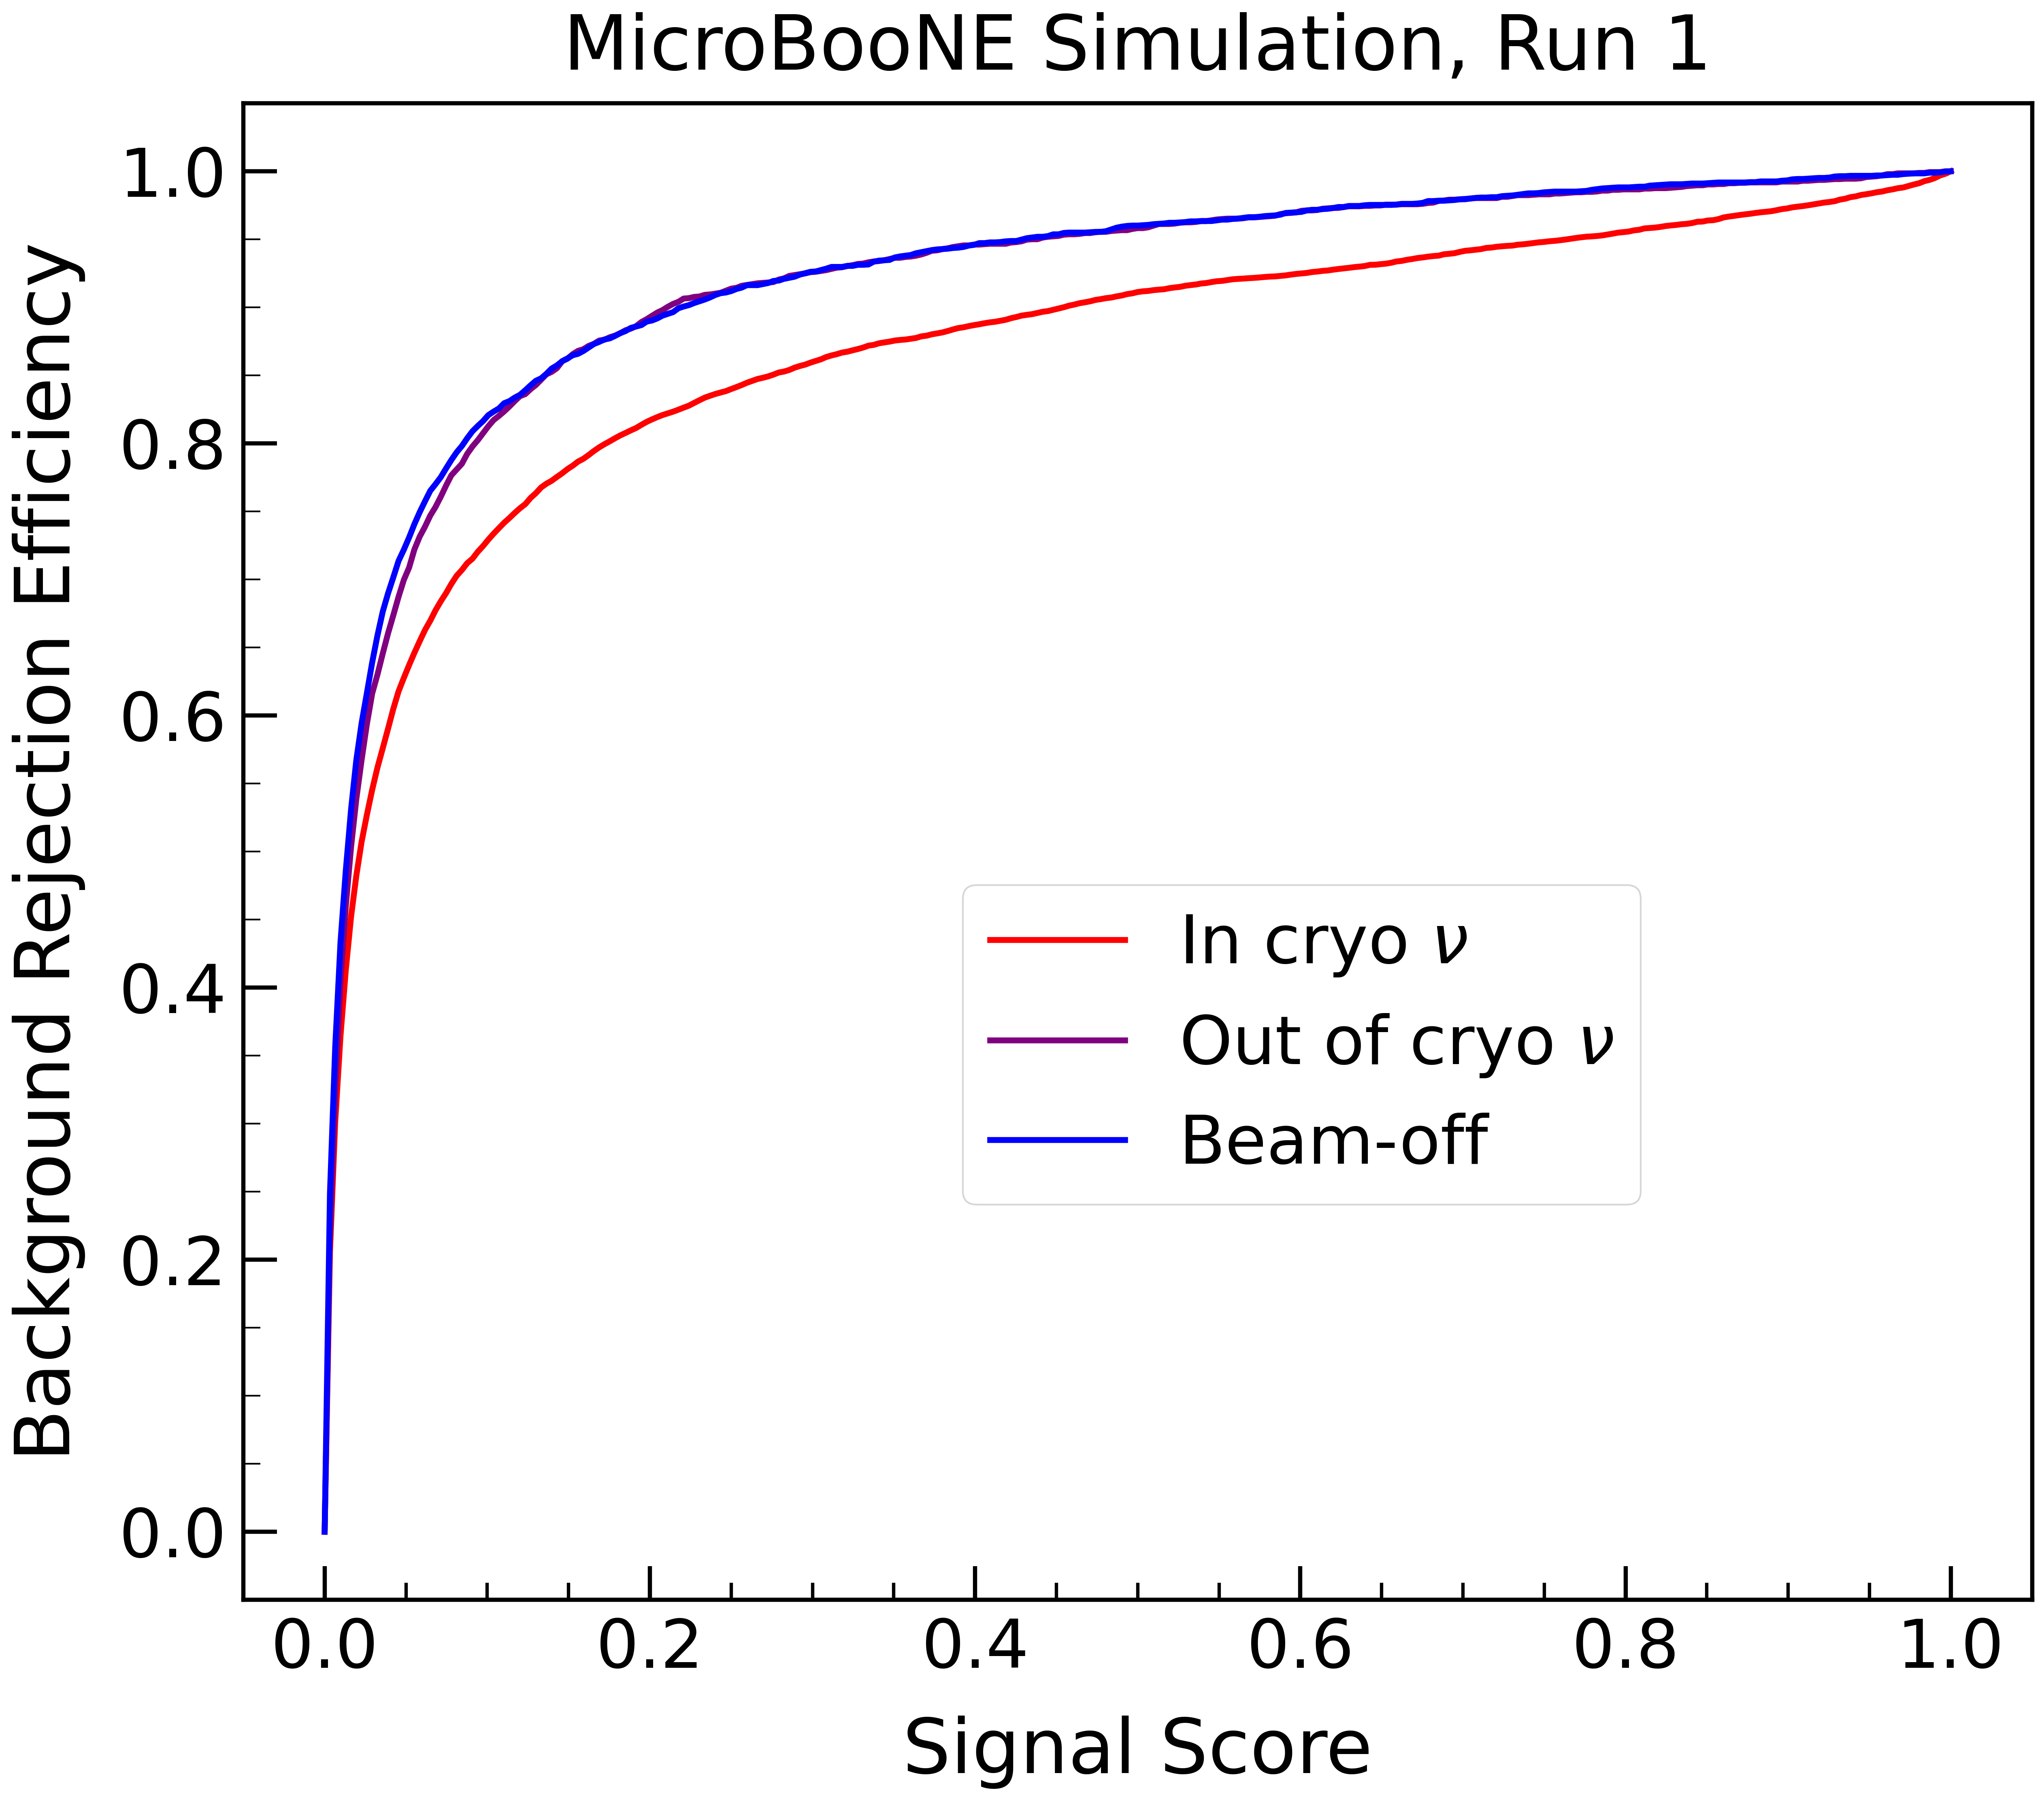

In [5]:
step = 8441


df_nu = pd.read_csv(base_bkg + run + "_nu_overlay_CNN_scores_{}_steps.csv".format(step))
df_dirt = pd.read_csv(base_bkg + run + "_dirt_CNN_scores_{}_steps.csv".format(step))
df_offbeam = pd.read_csv(base_bkg + run + "_offbeam_CNN_scores_{}_steps.csv".format(step))

df_nu = df_nu[df_nu['signal_score'] >= 0.]
df_dirt = df_dirt[df_dirt['signal_score'] >= 0.]
df_offbeam = df_offbeam[df_offbeam['signal_score'] >= 0.]

nu_scores, nu_eff, dummy_eff = GetEfficiency(df_nu,"background")
dirt_scores, dirt_eff, dummy_eff = GetEfficiency(df_dirt,"background")
offbeam_scores, offbeam_eff, dummy_eff = GetEfficiency(df_offbeam,"background")


figure_size = (19,16)
fig = plt.figure(figsize=figure_size,dpi=300)
ax = fig.add_subplot(111)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.plot(nu_scores,nu_eff,color='red',label=r'In cryo $\nu$',lw=3.5)
plt.plot(dirt_scores,dirt_eff,color='purple',label=r'Out of cryo $\nu$', lw=3.5)
plt.plot(offbeam_scores,offbeam_eff,color='blue',label="Beam-off",lw=3.5)
#plt.axhline(y=1.0,color='black',ls="--",lw=3.5)

plt.tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10)
plt.tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False)
plt.tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10)
plt.tick_params(axis="x", which='minor', direction="in",length=10,width=2.0,labelbottom=False)
plt.title(r"MicroBooNE Simulation, {}".format(run_flag),fontsize=45,pad=20)
plt.ylabel("Background Rejection Efficiency",fontsize=45,labelpad=20)
plt.xlabel("Signal Score",fontsize=45,labelpad=20)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.legend(fontsize=40,bbox_to_anchor=[0.8,0.5])
plt.savefig(figs_dir + "rejection_efficiency_per_background_{}.pdf".format(run),bbox_inches="tight")
plt.savefig(figs_dir + "rejection_efficiency_per_background_{}.png".format(run),bbox_inches="tight")
plt.show()